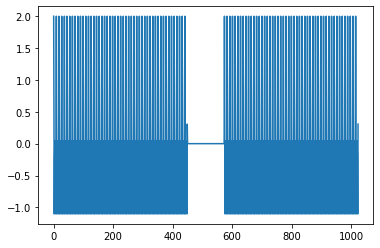

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Initializing the input signal
signal_in = np.zeros(1024) # 1024 samples
PI = math.pi
sample_instance=1.0/450.0
c=0.0
w=2*PI*50
wc=2*PI*1000
for i in range(450):
    signal_in[i] = (1+math.cos(w * c))*math.cos(wc * c)
    signal_in[574+i] = (1+math.cos(w * c))*math.cos(wc * c)
    c = c+sample_instance

plt.plot(signal_in)

# Initializing X and Y
X = np.fft.fft(np.eye(32)) # DFT matrix
Y = []
for i in range(32):
    Y.append(signal_in[i*32]) # A subset of the input signal (32 samples)

In [2]:
# Lasso Regression using gradient descent
iterations = 1000
learning_rate = 0.01
l1_penality = 500

m,n = X.shape

# weight initialization
W = np.zeros( n )
b = 0

# Gradient descent learning       
for i in range(iterations ) :
    Y_pred = X.dot( W ) + b
          
    # Calculate gradients    
    dW = np.zeros( n ) 
    for j in range( n ) :
        if W[j] > 0 :    
            dW[j] = ( - ( 2 * ( X[:, j] ).dot( Y - Y_pred ) ) + l1_penality ) / m
        else :
            dW[j] = ( - ( 2 * ( X[:, j] ).dot( Y - Y_pred ) ) - l1_penality ) / m
         
db = - 2 * np.sum( Y - Y_pred ) / m 
    
# Update weights
W = W - learning_rate * dW
b = b - learning_rate * db             

<ipython-input-2-04c2de507bf0>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  dW[j] = ( - ( 2 * ( X[:, j] ).dot( Y - Y_pred ) ) - l1_penality ) / m


In [3]:
import matplotlib.pyplot as plt 
# The signal is reconstructed using the IFT of the weight vector.
reconstruct = np.fft.ifft(W)

C:\Program Files\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


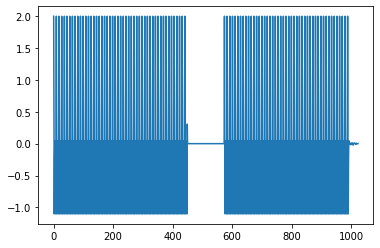

In [4]:
# Recovering the original signal
import scipy.signal as sig
rec,rem = sig.deconvolve(signal_in, reconstruct)
plt.plot(np.convolve(rec,reconstruct))